In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

# Introduction to AI and OpenVino
## Lecture 06

## Random Forest

In [2]:
###------------------
### Import statements
###------------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits, load_iris, make_blobs, load_breast_cancer #####
from sklearn.tree import DecisionTreeClassifier, export_graphviz, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier ####
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import train_test_split
import graphviz

import matplotlib.image as mpimg

In [3]:
inpDir = os.path.join('..', '..', 'input')
outDir = '../output'
moduleDir = 'machine_learning'

RANDOM_STATE = 24
np.random.seed(RANDOM_STATE)

TEST_SIZE = 0.2

In [4]:
digits = load_digits()

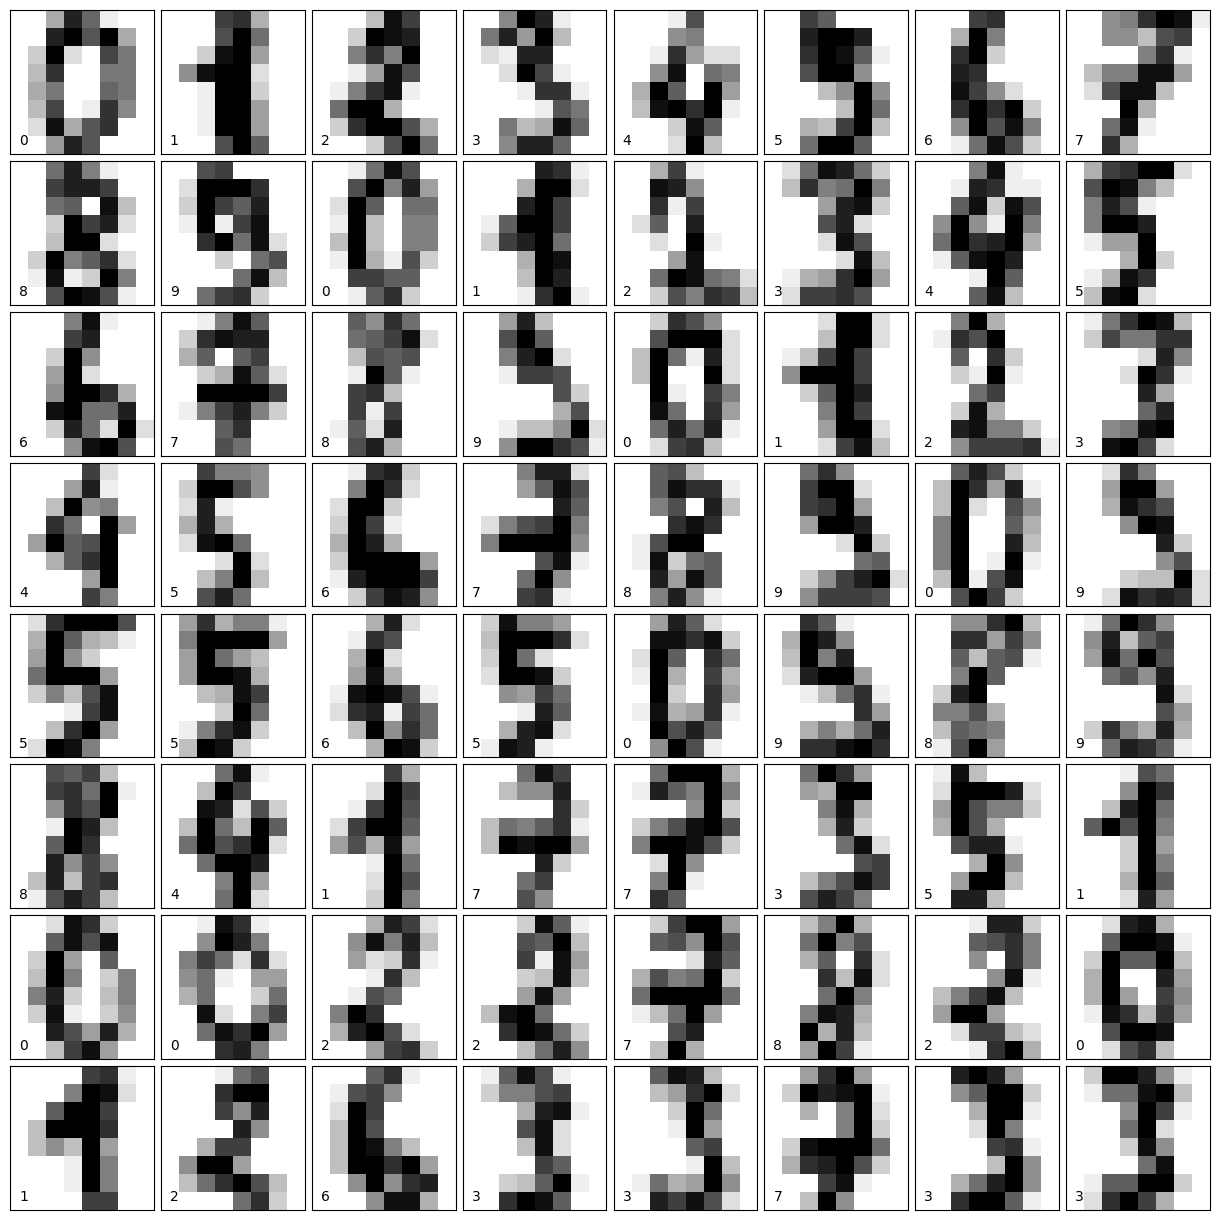

In [5]:
# set up the figure
fig = plt.figure(figsize=(12, 12))  # figure size in inches
fig.subplots_adjust(left=0, right=1, 
                    bottom=0, top=1, 
                    hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    
    ax.imshow(digits.images[i], 
              cmap=plt.cm.binary, 
              interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(digits.target[i]))

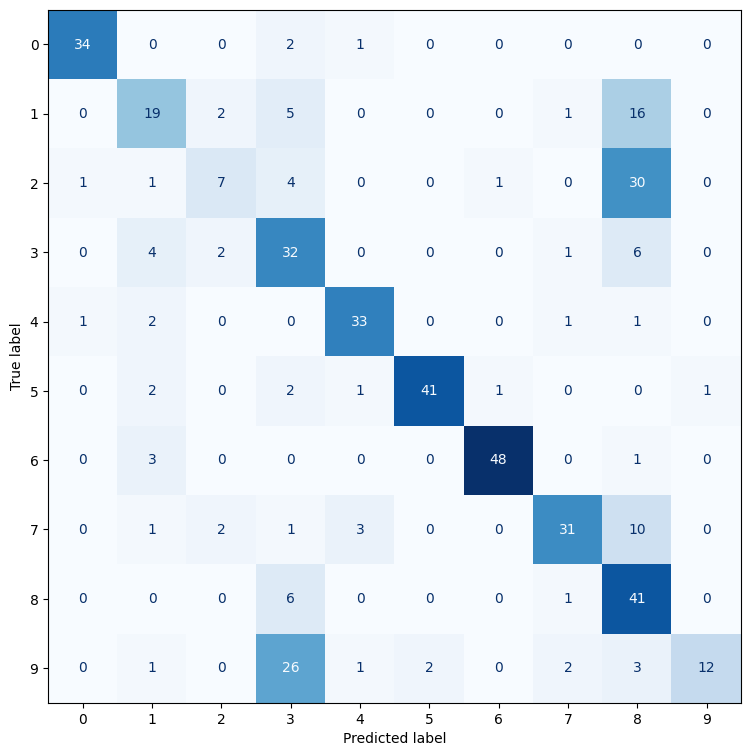

In [6]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    random_state=0)

clf = DecisionTreeClassifier(max_depth=5)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=digits.target_names)

fig, ax = plt.subplots(figsize = (9,9))

disp.plot(ax = ax, cmap=plt.cm.Blues, colorbar=False);

ax.grid(False)

RF: max_depth =   3 | F1 Score :  0.8766
RF: max_depth =   5 | F1 Score :  0.9355
RF: max_depth =  10 | F1 Score :  0.9778


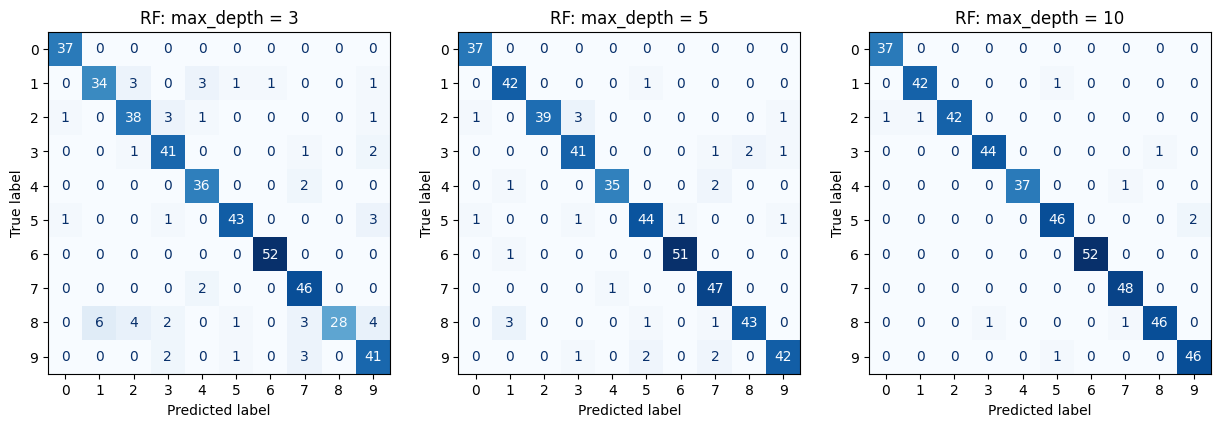

In [7]:
# random forest results
fig, axes = plt.subplots(1,3, figsize = (15,8))

for i, max_depth in enumerate([3, 5, 10]):
    clf = RandomForestClassifier(max_depth=max_depth).fit(X_train,
                                                          y_train)
    y_pred = clf.predict(X_test)
    print("RF: max_depth = {:3d}".format(max_depth), end = ' | ')
    print("F1 Score : {: .4f}".format(f1_score(y_test, y_pred, 
                                               average='weighted')))
    
    cm = confusion_matrix(y_test, y_pred)

    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=digits.target_names)

    disp.plot(ax = axes[i], cmap=plt.cm.Blues, colorbar=False);
    axes[i].set_title("RF: max_depth = {0}".format(max_depth))
    axes[i].grid(False)

In [8]:
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import RandomizedSearchCV

In [9]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [ ]:
xg_clf = xgb.XGBClassifier(#tree_method='hist',
    tree_method = "hist", device = "cuda",
    random_state=RANDOM_STATE,
    verbosity = 1)

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
          'learning_rate': [0.01, 0.1, 0.2, 0.3],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.4, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
          'n_estimators': [100, 500, 1000]}

clf = RandomizedSearchCV(estimator=xg_clf,
                         param_distributions=params,
                         scoring='accuracy',
                         n_iter=25,
                         verbose=1)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

print("Best Accuracy: ", clf.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/home/pks/May2024/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [20:21:56] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)
